![image](./images/pandas.png)

Pandas est le package de prédilection pour traiter des données structurées.

Pandas est basé sur 2 structures extrêmement liées les Series et le DataFrame.

Ces deux structures permettent de traiter des données sous forme de tableaux indexés.

Les classes de Pandas utilisent des classes de Numpy, il est donc possible d'utiliser les fonctions universelles de Numpy sur les objets Pandas.

In [1]:
# on importe pandas avec :
import pandas as pd
import numpy as np
%matplotlib inline

# Les Series de Pandas

- Les Series sont indexées, c'est leur avantage sur les arrays de NumPy
- On peut utiliser les fonctions `.values` et `.index` pour voir les différentes parties de chaque Series
- On définit une Series par `pd.Series([,], index=['','',])`
- On peut appeler un élément avec `ma_serie['France']`
- On peut aussi faire des conditions :
```python
ma_serie[ma_serie>5000000]
```
```
'France' in ma_serie
```
- Les objets Series peuvent être transformés en dictionnaires en utilisant :
`.to_dict()`

**Exercice :**
    
Définir un objet Series comprenant la population de 5 pays puis afficher les pays ayant une population > 50’000’000.


In [2]:
ser_pop = pd.Series([70,8,300,1200],index=["France","Suisse","USA","Chine"])

In [3]:
ser_pop

France      70
Suisse       8
USA        300
Chine     1200
dtype: int64

In [4]:
# on extrait une valeur avec une clé
ser_pop["France"]

70

In [5]:
# on peut aussi utiliser une position avec .iloc[]
ser_pop.iloc[0]

70

In [6]:
# on applique la condition entre []
ser_pop[ser_pop>50]

France      70
USA        300
Chine     1200
dtype: int64

# D'autres opérations sur les objets series

- Pour définir le nom de la Series, on utilise `.name`
- Pour définir le titre de la colonne des observations, on utilise `.index.name`

**Exercice :**
    
Définir les noms de l’objet et de la colonne des pays pour la Series précédente


In [7]:
ser_pop.name = "Populations"
ser_pop.index.name = "Pays"

In [8]:
ser_pop

Pays
France      70
Suisse       8
USA        300
Chine     1200
Name: Populations, dtype: int64

# Les données manquantes

Dans pandas, les données manquantes sont identifiés avec les fonctions de Numpy (`np.nan`). On a d'autres fonctions telles que :

In [9]:
pd.Series([2,np.nan,4],index=['a','b','c'])

a    2.0
b    NaN
c    4.0
dtype: float64

In [10]:
pd.isna(pd.Series([2,np.nan,4],index=['a','b','c']))

a    False
b     True
c    False
dtype: bool

In [11]:
pd.notna(pd.Series([2,np.nan,4],index=['a','b','c']))

a     True
b    False
c     True
dtype: bool

# Les dates avec pandas

- Python possède un module datetime qui permet de gérer facilement des dates
- Pandas permet d'appliquer les opérations sur les dates aux Series et aux DataFrame
- Le format es dates Python est `YYYY-MM-DD HH:MM:SS`

- On peut générer des dates avec la fonction `pd.date_range()` avec différente fréquences `freq=`
- On peut utiliser ces dates comme index dans un DataFrame ou dans un objet Series
- On peut changer la fréquence en utilisant `.asfreq()`
- Pour transformer une chaine de caractère en date, on utilise `pd.to_datetime()` avec l’option `dayfirst=True` si on est dans le cas français
-On pourra aussi spécifier un format pour accélérer le processus `%Y%m%d`

**Exercice :**

Créez un objet Series et ajoutez des dates partant du 3 octobre 2017 par jour jusqu’à aujourd’hui. Afficher le résultat dans un graphique (on utilisera la méthode `.plot()`

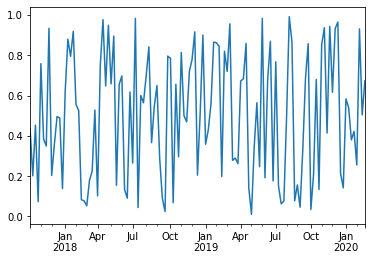

In [12]:
dates = pd.date_range("2017-10-03", "2020-02-27",freq="W")

valeurs = np.random.random(size=len(dates))
ma_serie=pd.Series(valeurs, index =dates)
ma_serie.plot()

In [13]:
len(dates)

125

# Le DataFrame 

- Les DataFrame sont des objets très souples pouvant être construits de différentes façon
- On peut les construire en récupérant des données copier / coller, où directement sur Internet, ou en entrant les valeurs manuellement


- Les DataFrame se rapprochent des dictionnaires et on peut construire ces objets en utilisant `DataFrame(dico)`
- De nombreux détails sur la création des DataFrame se trouve sur ce site :

<http://pandas.pydata.org/pandas-docs/dev/generated/pandas.DataFrame.html>


# Construction de DataFrame

On peut simplement construire un DataFrame avec le classe pd.DataFrame() à partir de différentes structures :

In [14]:
frame1=pd.DataFrame(np.random.randn(10).reshape(5,2),
             index=["obs_"+str(i) for i in range(5)],
             columns=["col_"+str(i) for i in range(2)])
frame1

,col_0,col_1
obs_0,-1.226662,-0.829278
obs_1,-0.059624,0.272161
obs_2,-1.947635,-3.129201
obs_3,0.601897,0.547773
obs_4,-0.693393,1.307139


# Opérations sur les DataFrame

On peut afficher le nom des colonnes :

In [15]:
print(frame1.columns)

Index(['col_0', 'col_1'], dtype='object')


On peut accéder à une colonne avec :
- `frame1.col_0` : attention au cas de nom de colonnes avec des espaces...
- `frame1['col_0']`

On peut accéder à une cellule avec :
- `frame1.loc['obs1','col_0']` : on utilise les index et le nom des colonnes
- `frame1.iloc[1,0]` : on utilise les positions dans le DataFrame


# Options de visualisation et de résumé

Pour afficher les 3 premières lignes, on peut utiliser :


In [16]:
frame1.head(3)

,col_0,col_1
obs_0,-1.226662,-0.829278
obs_1,-0.059624,0.272161
obs_2,-1.947635,-3.129201


Pour afficher un résumé du DF :

In [17]:
frame1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5 entries, obs_0 to obs_4
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   col_0   5 non-null      float64
 1   col_1   5 non-null      float64
dtypes: float64(2)
memory usage: 120.0+ bytes


# Importer des données externes

Pandas est l'outil le plus efficace pour importer des données externes, il prend en charge de nombreux formats dont csv, Excel, SQL, SAS...


## Importation de données avec Pandas

Quel que soit le type de fichier, Pandas possède une fonction :
```python
frame=pd.read_...('chemin_du_fichier/nom_du_fichier',...)
```
Pour écrire un DataFrame dans un fichier, on utilise :
```python
frame.to_...('chemin_du_fichier/nom_du_fichier',...)
```

**Exercice :**
    
Importer un fichier `.csv` avec `pd.read_csv()`. On utilisera le fichier "./data/airbnb.csv"

In [18]:
# on prend la colonne id comme index de notre DataFrame
airbnb = pd.read_csv("https://www.stat4decision.com/airbnb.csv",index_col="id")

C:\Users\s4d-asus-14\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (43,61,62) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [19]:
airbnb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59126 entries, 3109 to 34477345
Columns: 105 entries, listing_url to reviews_per_month
dtypes: float64(23), int64(20), object(62)
memory usage: 47.8+ MB


In [20]:
# la colonne price est sous forme d'objet et donc de chaîne de caractères
# on a 2933 locations qui coûtent 80$ la nuit
airbnb["price"].value_counts()

$80.00       2933
$60.00       2895
$70.00       2794
$50.00       2779
$100.00      2486
             ... 
$969.00         1
$1,740.00       1
$1,190.00       1
$542.00         1
$8,288.00       1
Name: price, Length: 677, dtype: int64

In [21]:
dpt = pd.read_csv("./data/base-dpt.csv", sep = ";")
dpt.head()

,CODGEO,LIBGEO,REG,DEP,P14_POP,P09_POP,SUPERF,NAIS0914,DECE0914,P14_MEN,...,ETAZ15,ETBE15,ETFZ15,ETGU15,ETGZ15,ETOQ15,ETTEF115,ETTEFP1015,Geo Shape,geo_point_2d
0,95555,Saint-Gratien,11,95,20996.0,20258.0,2.42,1564.0,749.0,8909.817815,...,3.0,38.0,142.0,1078.0,225.0,214.0,335.0,67.0,"{""type"": ""Polygon"", ""coordinates"": [[[2.274621...","48.9695044801, 2.28470111182"
1,95488,Pierrelaye,11,95,8155.0,7920.0,9.21,639.0,243.0,2891.000000,...,8.0,47.0,135.0,623.0,241.0,65.0,228.0,72.0,"{""type"": ""Polygon"", ""coordinates"": [[[2.193617...","49.0190794714, 2.1606870483"
2,95543,Saint-Cyr-en-Arthies,11,95,242.0,229.0,3.89,9.0,4.0,93.154812,...,2.0,0.0,2.0,5.0,2.0,4.0,4.0,0.0,"{""type"": ""Polygon"", ""coordinates"": [[[1.732068...","49.058878265, 1.74176317637"
3,95523,La Roche-Guyon,11,95,446.0,447.0,4.61,18.0,21.0,186.507593,...,0.0,6.0,6.0,48.0,17.0,14.0,13.0,4.0,"{""type"": ""Polygon"", ""coordinates"": [[[1.623323...","49.0883415268, 1.63442788467"
4,95678,Villiers-Adam,11,95,838.0,828.0,9.82,45.0,29.0,340.831981,...,6.0,3.0,8.0,53.0,12.0,5.0,14.0,2.0,"{""type"": ""Polygon"", ""coordinates"": [[[2.236020...","49.0697597649, 2.23847351378"


In [22]:
dpt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 38 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   CODGEO         1300 non-null   int64  
 1   LIBGEO         1300 non-null   object 
 2   REG            1300 non-null   int64  
 3   DEP            1300 non-null   int64  
 4   P14_POP        1297 non-null   float64
 5   P09_POP        1297 non-null   float64
 6   SUPERF         1297 non-null   float64
 7   NAIS0914       1297 non-null   float64
 8   DECE0914       1297 non-null   float64
 9   P14_MEN        1297 non-null   float64
 10  NAISD16        1296 non-null   float64
 11  DECESD16       1296 non-null   float64
 12  P14_LOG        1297 non-null   float64
 13  P14_RP         1297 non-null   float64
 14  P14_RSECOCC    1297 non-null   float64
 15  P14_LOGVAC     1297 non-null   float64
 16  P14_RP_PROP    1297 non-null   float64
 17  NBMENFISC14    1280 non-null   float64
 18  PIMP14  

# D'autres types de données

## JSON
Les objets JSON ressemblent à des dictionnaires.

On utilise le module `json` puis la fonction `json.loads()` pour transformer une entrée JSON en objet json

## HTML
On utilise `pd.read_html(url)`. Cet fonction est basée sur les packages `beautifulsoup` et `html5lib`

Cette fonction renvoie une liste de DataFrame qui représentent tous les DataFrame de la page. On ira ensuite chercher l'élément qui nous intéresse avec `frame_list[0]`

**Exercice :**
    
Importez un tableau en html depuis la page <http://www.fdic.gov/bank/individual/failed/banklist.html>

In [23]:
bank = pd.read_html("http://www.fdic.gov/bank/individual/failed/banklist.html")
# read_html() stocke les tableaux d'une page web dans une liste
type(bank)

list

In [24]:
len(bank)

1

In [25]:
bank[0].head(10)

,Bank Name,City,ST,CERT,Acquiring Institution,Closing Date
0,Ericson State Bank,Ericson,NE,18265,Farmers and Merchants Bank,"February 14, 2020"
1,City National Bank of New Jersey,Newark,NJ,21111,Industrial Bank,"November 1, 2019"
2,Resolute Bank,Maumee,OH,58317,Buckeye State Bank,"October 25, 2019"
3,Louisa Community Bank,Louisa,KY,58112,Kentucky Farmers Bank Corporation,"October 25, 2019"
4,The Enloe State Bank,Cooper,TX,10716,"Legend Bank, N. A.","May 31, 2019"
5,Washington Federal Bank for Savings,Chicago,IL,30570,Royal Savings Bank,"December 15, 2017"
6,The Farmers and Merchants State Bank of Argonia,Argonia,KS,17719,Conway Bank,"October 13, 2017"
7,Fayette County Bank,Saint Elmo,IL,1802,"United Fidelity Bank, fsb","May 26, 2017"
8,"Guaranty Bank, (d/b/a BestBank in Georgia & Mi...",Milwaukee,WI,30003,First-Citizens Bank & Trust Company,"May 5, 2017"
9,First NBC Bank,New Orleans,LA,58302,Whitney Bank,"April 28, 2017"


In [26]:
nba = pd.read_html("https://en.wikipedia.org/wiki/2018%E2%80%9319_NBA_season")

In [27]:
len(nba)

40

In [28]:
nba[3]

,Atlantic Division,W,L,PCT,GB,Home,Road,Div,GP
0,y – Toronto Raptors,58,24,0.707,0.0,32–9,26–15,12–4,82
1,x – Philadelphia 76ers,51,31,0.622,7.0,31–10,20–21,8–8,82
2,x – Boston Celtics,49,33,0.598,9.0,28–13,21–20,10–6,82
3,x – Brooklyn Nets,42,40,0.512,16.0,23–18,19–22,8–8,82
4,New York Knicks,17,65,0.207,41.0,9–32,8–33,2–14,82


# Importer depuis Excel

On a deux approches pour Excel :
- On peut utiliser `pd.read_excel()`
- On peut utiliser la classe `pd.ExcelFile()`

Dans ce cas, on utilise :
```python
xlsfile=pd.ExcelFile('fichier.xlsx')
xlsfile.parse('Sheet1')
```

**Exercice :** 
    
Importez un fichier Excel avec les deux approches, on utilisera : `credit2.xlsx` et `ville.xls`

In [29]:
pd.read_excel("./data/credit2.xlsx",usecols=["Age","Gender"])
pd.read_excel("./data/credit2.xlsx",usecols="A:C")
credit2 = pd.read_excel("./data/credit2.xlsx", index_col="Customer_ID")

In [30]:
credit2.head()

,Age,Gender,Marital_Status,Age_Youngest_Child,Number_of_Workers_in_Household,Percentage_White_Collar_Workers,Household_Debt_to_Equity_Ratio,Income,Homeowner
Customer_ID,,,,,,,,,
5409,40,F,S,11,6,37,56,37073,F
5477,47,M,M,13,13,30,56,50721,F
5507,35,F,U,1,9,33,57,43578,T
8,45,M,U,15,7,30,62,69553,F
158,13,F,S,0,7,27,64,37502,T


In [31]:
# on crée un objet du type ExcelFile
ville = pd.ExcelFile("./data/ville.xls")

In [32]:
ville.sheet_names

['ville', 'ville-ain']

In [33]:
# on extrait toutes les feuilles avec le mot ville dans le nom de la feuille dans une liste de dataframes
list_feuilles_ville = []
for nom in ville.sheet_names:
    if "ville" in nom:
         list_feuilles_ville.append(ville.parse(nom))

On crée une fonction qui permet d'importer les feuilles excel ayant le terme nom_dans_feuille dans le nom de la feuille

In [34]:
def import_excel_feuille(chemin_fichier, nom_dans_feuille = ""):
    """ fonction qui importe les feuilles excel ayant le terme nom_dans_feuille dans le nom de la feuille"""
    
    excel = pd.ExcelFile(chemin_fichier)
    list_feuilles = []
    for nom_feuille in excel.sheet_names:
        if nom_dans_feuille in nom_feuille:
            list_feuilles.append(excel.parse(nom))
    return list_feuilles

In [35]:
list_ain = import_excel_feuille("./data/ville.xls",nom_dans_feuille="ain")

In [36]:
list_ain[0].head()

,NomVille,MAJ,Code Postal,Code INSEE,Code Région,Latitude,Longitude,Eloignement
0,Saint-Denis-lès-Bourg,SAINT DENIS LES BOURG,1000,1344,82,46.200000,5.200000,1.00
1,Bourg-en-Bresse,BOURG EN BRESSE,1000,1053,82,46.200000,5.216667,1.00
2,Lurcy,LURCY,1090,1225,82,46.066667,4.766667,1.97
3,Montmerle-sur-Saône,MONTMERLE SUR SAONE,1090,1263,82,46.083333,4.766667,1.97
4,Genouilleux,GENOUILLEUX,1090,1169,82,46.116667,4.783333,1.91


# Importer des données SQL

Pandas possède une fonction `read_sql()` qui permet d’importer directement des bases de données ou des queries dans des DataFrame

Il faut tout de même un connecteur pour accéder aux bases de données

Pour mettre en place ce connecteur, on utlise le package SQLAlchemy.

Suivant le type de base de données, on utilisera différents codes mais la structure du code est toujours la même

In [37]:
# on importe l'outil de connexion
from sqlalchemy import create_engine

On crée une connexion
```python
connexion=create_engine("sqlite:///(...).sqlite")
```

On utlise une des fonctions de Pandas pour charger les données
```python
requete="""select ... from ..."""
frame_sql=pd.read_sql_query(requete,connexion)
```

**Exercices :**
    
Importez la base de données SQLite salaries et récupérez la table Salaries dans un DataFrame 

In [38]:
connexion=create_engine("sqlite:///./data/salaries.sqlite")

In [39]:
connexion.table_names()

['Salaries']

In [40]:
salaries = pd.read_sql_query("select * from salaries", con=connexion)

In [41]:
salaries.head()

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411,0,400184,,567595.43,567595.43,2011,,San Francisco,
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966,245132,137811,,538909.28,538909.28,2011,,San Francisco,
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739,106088,16452.6,,335279.91,335279.91,2011,,San Francisco,
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916,56120.7,198307,,332343.61,332343.61,2011,,San Francisco,
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134402,9737,182235,,326373.19,326373.19,2011,,San Francisco,


# Importer depuis SPSS

Pandas possède une fonction `pd.read_spss()`

Attention ! Il faut la dernière version de Pandas et installer des packages supplémentaires !

**Exercice :** Importer le fichier SPSS se trouvant dans ./data/

In [42]:
#base = pd.read_spss("./data/Base.sav")

# Les tris avec Pandas 

Pour effectuer des tris, on utilise :
- `.sort_index()` pour le tri des index
- `.sort_values()` pour le tri des données
- `.rank()` affiche le rang des observations

Il peut y avoir plusieurs tris dans la même opération. Dans ce cas, on utilise des listes de colonnes :
```python
frame.sort_values(["col_1","col_2"])
```

**Exercice :** 
    
Triez les données sur les salaires en se basant sur le TotalPay et le JobTitle

In [43]:
salaries.sort_values(["JobTitle","TotalPay"],ascending=[True, False])

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
20765,20766,NAPOLEON VIRAY,ACCOUNT CLERK,60838.2,0,0,,60838.20,60838.20,2011,,San Francisco,
20867,20868,BERNADETTE RAMOS,ACCOUNT CLERK,49777.8,10753.1,0,,60530.87,60530.87,2011,,San Francisco,
21638,21639,SUSAN CHANG,ACCOUNT CLERK,51306.3,5406.34,1814.58,,58527.20,58527.20,2011,,San Francisco,
22972,22973,OLIVIA BOUDREAUX,ACCOUNT CLERK,49778.2,3811.68,1084.76,,54674.59,54674.59,2011,,San Francisco,
24132,24133,LI-XIN CAI,ACCOUNT CLERK,49777.8,1390.45,624,,51792.25,51792.25,2011,,San Francisco,
...,...,...,...,...,...,...,...,...,...,...,...,...,...
58842,58843,Mario Yedidia,Youth Comm Advisor,57544.7,0,0,28229.7,57544.73,85774.39,2012,,San Francisco,
98074,98075,Phimy Truong,Youth Comm Advisor,52433.9,0,0,25297.5,52433.88,77731.38,2013,,San Francisco,
138458,138459,Phimy Truong,Youth Comm Advisor,32417.4,0,4048.49,15545.3,36465.91,52011.19,2014,,San Francisco,PT
103333,103334,Mario R Yedidia,Youth Comm Advisor,13915.8,0,5296.91,5744.53,19212.71,24957.24,2013,,San Francisco,


# Les statistiques simples

Les Dataframe possèdent de nombreuses méthodes pour calculer des statistiques simples :
- `.sum(axis=0)` permet de faire une somme par colonne
- `.sum(axis=1)` permet de faire une somme par ligne
- `.min()` et `.max()` donnent le minimum par colonne
- `.idxmin()` et `.idxmax()` donnent l’index du minimum et du maximum
- `.describe()` affiche un tableau de statistiques descriptives par colonne
- `.corr()` pour calculer la corrélation entre les colonnes

**Exercice :**
    
Obtenir les différentes statistiques descriptives pour les données AirBnB.

On peut s'intéresser à la colonne `Price` (attention des prétraitements sont nécessaires)


In [44]:
# cette colonne est sous forme d'object, il va falloir la modifier
airbnb["price"].dtype

dtype('O')

In [45]:
airbnb["price_num"] = pd.to_numeric(airbnb["price"].str.replace("$","")
                                   .str.replace(",",""))

In [46]:
airbnb["price_num"].dtype

dtype('float64')

In [47]:
airbnb["price_num"].mean()

116.32598180157629

In [48]:
airbnb["price_num"].describe()

count    59126.000000
mean       116.325982
std        167.669754
min          0.000000
25%         59.000000
50%         80.000000
75%        120.000000
max       9379.000000
Name: price_num, dtype: float64

In [49]:
# on extrait l'id de la location avec le prix max
airbnb["price_num"].idxmax()

7225849

In [50]:
# on affiche cette location
airbnb.loc[airbnb["price_num"].idxmax()]

listing_url                                                  https://www.airbnb.com/rooms/7225849
scrape_id                                                                          20190507030954
last_scraped                                                                           2019-05-07
name                                                               Artistic apartment, Montmartre
summary                                         2 bedrooms on different floors in this Duplex....
                                                                      ...                        
calculated_host_listings_count_entire_homes                                                     1
calculated_host_listings_count_private_rooms                                                    0
calculated_host_listings_count_shared_rooms                                                     0
reviews_per_month                                                                            0.51
price_num           

Calcul de la moyenne pondérée sur une enquête

In [51]:
base = pd.read_csv("./data/Base.csv")

In [52]:
#moyenne pondérée
np.average(base["resp_age"],weights=base["Weight"])

48.402976312335646

In [53]:
# moyenne
base["resp_age"].mean()

48.588

Utilisation de statsmodels

In [54]:
from statsmodels.stats.weightstats import DescrStatsW

C:\Users\s4d-asus-14\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [55]:
# on sélectionne les colonnes numériques
base_num = base.select_dtypes(np.number)
# on calcule les stats desc pondérées
mes_stat = DescrStatsW(base_num, weights=base["Weight"])

In [56]:
base_num.columns

Index(['Unnamed: 0', 'resp_age', 'Weight'], dtype='object')

In [57]:
mes_stat.var

array([8.34826333e+04, 2.93471038e+02, 7.20773849e-02])

In [58]:
mes_stat_age = DescrStatsW(base["resp_age"], weights=base["Weight"])

In [59]:
mes_stat_age.mean

48.40297631233564

On va construire une fonction permettant de calculer les stat desc pondérées d'une colonne

In [61]:
def stat_desc_w_ipsos(data, columns, weights):
    """ Cette fonction calcule et affiche les moyennes et écarts-types pondérés
    
    Input : - data : données sous forme de DataFrame
            - columns : nom des colonnes quanti à analyser
            - weights : nom de la colonne des poids
    """
    
    from statsmodels.stats.weightstats import DescrStatsW
    mes_stats = DescrStatsW(data[columns],weights=data[weights])
    print("Moyenne pondérée :", mes_stats.mean)
    print("Ecart-type pondéré :", mes_stats.std)
    

In [62]:
stat_desc_w_ipsos(base,"resp_age","Weight")

Moyenne pondérée : 48.40297631233564
Ecart-type pondéré : 17.1309963999935


# Le traitement des données manquantes

- Les données manquantes sont identifiées par `NaN`


- `.dropna()` permet de retirer les données manquantes dans un objet Series et l’ensemble d’une ligne dans le cas d’un DataFrame
- Pour éliminer par colonne, on utilise `.dropna(axis=1)`
- Remplacer toutes les données manquantes `.fillna(valeur)`


# Les jointures avec Pandas

On veut joindre des jeux de données en utilisant des clés (variables communes)

- `pd.merge()` permet de joindre deux DataFrame, on utilise comme options `on='key'`

- On peut utiliser comme option `how=`, on peut avoir :
    - `left` dans ce cas, on garde le jeu de données à gauche et pour les données de droite des valeurs manquantes sont ajoutées.
    - `outer`, on garde toutes les valeurs des deux jeux de données
    - ...

- On peut avoir plusieurs clés et faire une jointure sur les deux clés `on=['key1','key2']`

Pour plus de détails : <http://pandas.pydata.org/pandas-docs/dev/generated/pandas.DataFrame.merge.html>


**Exercice :**
    
Joindre deux dataframes (credit1 et credit2).


In [63]:
credit1 = pd.read_csv("./data/credit1.txt",sep="\t")

In [64]:
credit_global = pd.merge(credit1,credit2,how="inner",on="Customer_ID")

In [65]:
credit_global.head()

,Months_as_a_Customer,Number_of_Products,RFM_Score,Average_Balance_Feed_Index,Number_of_Transactions,Personal_Debt_to_Equity_Ratio,Months_Current_Account,Number_of_Loan_Accounts,Customer_ID,Has_Bad_Payment_Record,...,Interested_in_Credit_Card,Age,Gender,Marital_Status,Age_Youngest_Child,Number_of_Workers_in_Household,Percentage_White_Collar_Workers,Household_Debt_to_Equity_Ratio,Income,Homeowner
0,24,3,10,229,2,40,13,0,5409,0,...,F,40,F,S,11,6,37,56,37073,F
1,12,2,12,8,1,47,5,2,5477,0,...,F,47,M,M,13,13,30,56,50721,F
2,36,0,0,0,0,35,31,0,5507,0,...,F,35,F,U,1,9,33,57,43578,T
3,0,0,0,0,0,45,-3,0,8,0,...,F,45,M,U,15,7,30,62,69553,F
4,48,0,0,0,0,13,39,0,158,0,...,F,13,F,S,0,7,27,64,37502,T


On fait une jointure entre les données des locations Airbnb et les données de calendrier de remplissage des appartements

In [66]:
airbnb_reduit = airbnb[["price_num","latitude","longitude"]]

In [67]:
calendar = pd.read_csv("https://www.stat4decision.com/calendar.csv.gz")

In [68]:
calendar.head()

,listing_id,date,available,price
0,2679020,2019-03-09,f,NaN
1,2679020,2019-03-08,f,NaN
2,2679020,2019-03-07,f,NaN
3,2679020,2019-03-06,f,NaN
4,2679020,2019-03-05,f,NaN


In [69]:
new_airbnb = pd.merge(calendar,airbnb[["price_num","latitude","longitude"]], 
                      left_on = "listing_id",right_index=True)

In [70]:
new_airbnb.shape

(13286730, 7)

On veut extraire des statistiques de base

Par exemple, la moyenne des prix pour les locations du 8 juillet 2018 :

In [71]:
new_airbnb[new_airbnb["date"]=='2018-07-08']["price_num"].mean()

105.64795890335697

On extrait le nombre de nuitées disponibles / occuppées :

In [72]:
new_airbnb["available"].value_counts(normalize = True)

f    0.78342
t    0.21658
Name: available, dtype: float64

Si on regarde le part de locations occuppées le 8 janvier 2019, on a :

In [73]:
new_airbnb[new_airbnb["date"]=='2019-01-08']["available"].value_counts(normalize = True)

f    0.749464
t    0.250536
Name: available, dtype: float64

La moyenne des prix des appartements disponibles le 8 juillet 2018 :

In [74]:
new_airbnb[(new_airbnb["date"]=='2018-07-08')&(new_airbnb["available"]=='t')]["price_num"].mean()

143.92299781462913

On transforme la colonne date qui est sous forme de chaîne de caractère en DateTime, ceci permet de faire de nouvelles opérations : 

In [75]:
new_airbnb["date"]= pd.to_datetime(new_airbnb["date"])

In [76]:
# on construit une colonne avec le jour de la semaine 
new_airbnb["jour_semaine"]=new_airbnb["date"].dt.day_name()

La moyenne des pris des Samedi soirs disponibles est donc :

In [77]:
new_airbnb[(new_airbnb["jour_semaine"]=='Saturday')&(new_airbnb["available"]=='t')]["price_num"].mean()

148.03015520630126

# Gestion des duplications

- On utilise `.duplicated()` ou `.drop_duplicates()` dans le cas où on désire effacer les lignes se répétant


- On peut se concentrer sur une seule variables en entrant directement le nom de la variable. Dans ce cas, c’est la première apparition qui compte. Si on veut prendre la dernière apparition, on utilise l’option `keep="last"`. On pourra avoir :
```python
frame1.drop_duplicates(["col_0","col_1"],keep="last")
```

# Discrétisation

Pour discrétiser, on utilise la fonction `pd.cut()`, on va définir une liste de points pour discrétiser et on entre cette liste comme second paramètre de la fonction.

Une fois discrétisé, on peut afficher les modalités obtenues en utilisant `.categories`

On peut aussi compter les occurrence en utilisant `pd.value_counts()`

Il est aussi possible d’entrer le nombre de segments comme second paramètre

On utilisera aussi `qcut()`

**Exercice :**
    
Créez une variable dans le dataframe AirBnB pour obtenir des niveaux de prix.


In [78]:
airbnb["price_disc1"]=pd.cut(airbnb["price_num"],bins=5)
airbnb["price_disc2"]=pd.qcut(airbnb["price_num"],5)

In [79]:
airbnb["price_disc1"].value_counts()

(-9.379, 1875.8]    59078
(1875.8, 3751.6]       36
(7503.2, 9379.0]        6
(3751.6, 5627.4]        6
(5627.4, 7503.2]        0
Name: price_disc1, dtype: int64

In [80]:
airbnb["price_disc2"].value_counts()

(94.0, 140.0]      12338
(53.0, 70.0]       12226
(-0.001, 53.0]     11933
(70.0, 94.0]       11408
(140.0, 9379.0]    11221
Name: price_disc2, dtype: int64

# Les tableaux croisés avec Pandas

Les DataFrame possèdent des méthodes pour générer des tableaux croisés, notamment :
```python
frame1.pivot_table()
```
Cette méthode permet de gérer de nombreux cas avec des fonctions standards et sur mesure.

**Exercice :**
    
Afficher un tableau Pivot pour les données AirBnB.

In [81]:
# on définit un 
def moy2(x):
    return x.mean()/x.var()

On croise le room_type avec le niveau de prix et on regarde le review_score_rating moyen + le nombre d'occurences et une fonction "maison" :

In [82]:
airbnb['room_type']
airbnb['price_disc2']
airbnb['review_scores_rating']
airbnb.pivot_table(values=["review_scores_rating",'review_scores_cleanliness'],
                   index="room_type",
                   columns='price_disc2',aggfunc=["count","mean",moy2])

count                            \
                review_scores_cleanliness                             
price_disc2                (-0.001, 53.0] (53.0, 70.0] (70.0, 94.0]   
room_type                                                             
Entire home/apt                      6116         8387         8255   
Private room                         2882         1138          565   
Shared room                           276           31            9   

                                                                    \
                                              review_scores_rating   
price_disc2     (94.0, 140.0] (140.0, 9379.0]       (-0.001, 53.0]   
room_type                                                            
Entire home/apt          8935            7614                 6125   
Private room              497             377                 2888   
Shared room                12               4                  276   

                                                                         ...  \
                                                                         ...   
price_disc2     (53.0, 70.0] (70.0, 94.0] (94.0, 140.0] (140.0, 9379.0]  ...   
room_type                                                                ...   
Entire home/apt         8397         8260          8939            7617  ...   
Private room            1139          567           498             377  ...   
Shared room               31            9            12               4  ...   

                                     moy2                            \
                review_scores_cleanliness                             
price_disc2                (-0.001, 53.0] (53.0, 70.0] (70.0, 94.0]   
room_type                                                             
Entire home/apt                  6.075027     7.612211     8.877412   
Private room                     7.543198     8.525134    10.140190   
Shared room                      6.694956     3.843085     7.200000   

                                                                    \
                                              review_scores_rating   
price_disc2     (94.0, 140.0] (140.0, 9379.0]       (-0.001, 53.0]   
room_type                                                            
Entire home/apt      9.612459        9.508189             1.167378   
Private room        11.460844       10.486628             1.367265   
Shared room          4.753086        2.318182             0.750254   

                                                                         
                                                                         
price_disc2     (53.0, 70.0] (70.0, 94.0] (94.0, 140.0] (140.0, 9379.0]  
room_type                                                                
Entire home/apt     1.318967     1.504656      1.513630        1.274582  
Private room        1.802542     1.297678      1.235814        0.631607  
Shared room         0.443909     1.606953      0.742707        0.943010  

[3 rows x 30 columns]

# L'utilisation de GroupBy sur des DataFrame

- `.groupby` permet de rassembler des observations en fonction d’une variable dite de groupe


- Par exemple, `frame.groupby('X').mean()` donnera les moyennes par groupes de `X`


- On peut aussi utiliser `.size()` pour connaître la taille des groupes et utiliser d’autres fonctions (`.sum()`)


- On peut effectuer de nombreuses opérations de traitement avec le groupby


In [83]:
airbnb_group_room = airbnb.groupby(['room_type','price_disc2'])

airbnb_group_room["price_num"].describe()

count        mean          std    min  \
room_type       price_disc2                                                
Entire home/apt (-0.001, 53.0]    7866.0   43.600178     7.316925    0.0   
                (53.0, 70.0]     10758.0   63.152445     5.343269   54.0   
                (70.0, 94.0]     10642.0   82.359801     5.907960   71.0   
                (94.0, 140.0]    11572.0  112.378241    13.767830   95.0   
                (140.0, 9379.0]  10294.0  271.713037   295.084974  141.0   
Private room    (-0.001, 53.0]    3694.0   39.138332     8.811199    8.0   
                (53.0, 70.0]      1417.0   62.137615     5.286172   54.0   
                (70.0, 94.0]       753.0   81.745020     5.727528   71.0   
                (94.0, 140.0]      750.0  111.836000    13.031585   95.0   
                (140.0, 9379.0]    913.0  518.269441   492.555124  143.0   
Shared room     (-0.001, 53.0]     373.0   30.852547    10.128859    9.0   
                (53.0, 70.0]        51.0   61.686275     4.826967   54.0   
                (70.0, 94.0]        13.0   79.692308     5.807820   71.0   
                (94.0, 140.0]       16.0  108.812500    14.185527   95.0   
                (140.0, 9379.0]     14.0  924.357143  1276.929587  150.0   

                                   25%    50%      75%     max  
room_type       price_disc2                                     
Entire home/apt (-0.001, 53.0]    40.0   45.0    50.00    53.0  
                (53.0, 70.0]      60.0   63.0    69.00    70.0  
                (70.0, 94.0]      79.0   80.0    89.00    94.0  
                (94.0, 140.0]    100.0  110.0   120.00   140.0  
                (140.0, 9379.0]  160.0  200.0   280.00  9379.0  
Private room    (-0.001, 53.0]    33.0   40.0    46.00    53.0  
                (53.0, 70.0]      59.0   60.0    66.00    70.0  
                (70.0, 94.0]      77.0   80.0    87.00    94.0  
                (94.0, 140.0]    100.0  110.0   120.00   140.0  
                (140.0, 9379.0]  180.0  299.0  1000.00  8932.0  
Shared room     (-0.001, 53.0]    22.0   30.0    39.00    53.0  
                (53.0, 70.0]      59.0   60.0    65.00    70.0  
                (70.0, 94.0]      75.0   80.0    85.00    90.0  
                (94.0, 140.0]    100.0  100.0   119.25   139.0  
                (140.0, 9379.0]  225.0  500.0  1000.00  5000.0

In [84]:
# on peut afficher plusieurs statistiques
airbnb_group_room["price_num"].agg(["mean","median","std","count"])

mean  median          std  count
room_type       price_disc2                                            
Entire home/apt (-0.001, 53.0]    43.600178    45.0     7.316925   7866
                (53.0, 70.0]      63.152445    63.0     5.343269  10758
                (70.0, 94.0]      82.359801    80.0     5.907960  10642
                (94.0, 140.0]    112.378241   110.0    13.767830  11572
                (140.0, 9379.0]  271.713037   200.0   295.084974  10294
Private room    (-0.001, 53.0]    39.138332    40.0     8.811199   3694
                (53.0, 70.0]      62.137615    60.0     5.286172   1417
                (70.0, 94.0]      81.745020    80.0     5.727528    753
                (94.0, 140.0]    111.836000   110.0    13.031585    750
                (140.0, 9379.0]  518.269441   299.0   492.555124    913
Shared room     (-0.001, 53.0]    30.852547    30.0    10.128859    373
                (53.0, 70.0]      61.686275    60.0     4.826967     51
                (70.0, 94.0]      79.692308    80.0     5.807820     13
                (94.0, 140.0]    108.812500   100.0    14.185527     16
                (140.0, 9379.0]  924.357143   500.0  1276.929587     14

In [85]:
new_airbnb.groupby(['available','jour_semaine'])["price_num"].agg(["mean","count"])

mean    count
available jour_semaine                     
f         Friday         93.984082  1489923
          Monday         93.705971  1478706
          Saturday       93.992303  1485071
          Sunday         93.741308  1478014
          Thursday       93.978836  1501862
          Tuesday        93.723649  1481271
          Wednesday      93.845494  1494245
t         Friday        148.109168   409112
          Monday        148.281406   414198
          Saturday      148.030155   408553
          Sunday        148.064497   414890
          Thursday      148.634936   407882
          Tuesday       148.488103   412259
          Wednesday     148.571200   410744

Essayez d'utiliser une fonction lambda sur le groupby

**Exercice :**
    
- Données sur les salaires


- On utilise le `groupby()` pour rassembler les types d’emploi


- Et on calcule des statistiques pour chaque type


On peut utiliser la méthode `.agg()` avec par exemple `'mean'` comme paramètre

On utilise aussi fréquemment la méthode `.apply()` combinée à une fonction lambda

In [86]:
# on passe tous les JobTitle en minuscule
salaries["JobTitle"]= salaries["JobTitle"].str.lower()

In [87]:
# nombre de JobTitle différents
salaries["JobTitle"].nunique()

1637

In [88]:
salaries.groupby("JobTitle")["TotalPay"].mean().sort_values(ascending=False)

JobTitle
general manager-metropolitan transit authority    399211.275000
chief investment officer                          339653.700000
chief, fire department                            325971.683333
chief of police                                   313885.882500
deputy director of investments                    307899.460000
                                                      ...      
commissioner 16.700c, no pay                          25.760000
drug court coordinator                                 0.000000
public safety comm tech                                0.000000
is technician assistant                                0.000000
not provided                                           0.000000
Name: TotalPay, Length: 1637, dtype: float64

In [89]:
salaries.groupby("JobTitle")["TotalPay"].agg(["mean","count"]).sort_values("count",ascending=False)

,mean,count
JobTitle,,
transit operator,63958.939444,9424
special nurse,32717.231561,5791
registered nurse,113466.920872,4955
custodian,45448.577343,3214
firefighter,144222.334675,3153
...,...,...
"court assistant, superior court",77698.600000,1
shelter office assistant supervisor,56855.980000,1
shelter office supervisor,63313.140000,1


On peut aussi faire des représentations graphiques avancées :

In [90]:
import matplotlib.pyplot as plt

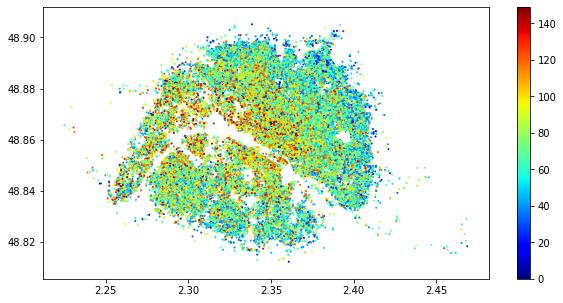

In [91]:
plt.figure(figsize=(10,5))
plt.scatter("longitude","latitude", data = airbnb[airbnb["price_num"]<150], s=1,c = "price_num", cmap=plt.get_cmap("jet"))
plt.colorbar()
plt.savefig("paris_airbnb.jpg")

In [92]:
airbnb[airbnb["price_num"]<150]

,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,...,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,price_num,price_disc1,price_disc2
id,,,,,,,,,,,,,,,,,,,,,
3109,https://www.airbnb.com/rooms/3109,20190507030954,2019-05-07,zen and calm,Appartement très calme de 50M2 Utilisation de ...,I bedroom appartment in Paris 14,I bedroom appartment in Paris 14 Good restaura...,none,Good restaurants very close the Montparnasse S...,NaN,...,f,f,1,1,0,0,0.28,75.0,"(-9.379, 1875.8]","(70.0, 94.0]"
5396,https://www.airbnb.com/rooms/5396,20190507030954,2019-05-08,Explore the heart of old Paris,"Cozy, well-appointed and graciously designed s...","Small, well appointed studio apartment at the ...","Cozy, well-appointed and graciously designed s...",none,"You are within walking distance to the Louvre,...",The staircase leading up to the apartment is n...,...,f,f,1,1,0,0,1.44,115.0,"(-9.379, 1875.8]","(94.0, 140.0]"
7397,https://www.airbnb.com/rooms/7397,20190507030954,2019-05-07,MARAIS - 2ROOMS APT - 2/4 PEOPLE,"VERY CONVENIENT, WITH THE BEST LOCATION !",PLEASE ASK ME BEFORE TO MAKE A REQUEST !!! No ...,"VERY CONVENIENT, WITH THE BEST LOCATION ! PLEA...",none,NaN,Important: Be conscious that an apartment in a...,...,f,f,1,1,0,0,2.47,115.0,"(-9.379, 1875.8]","(94.0, 140.0]"
8522,https://www.airbnb.com/rooms/8522,20190507030954,2019-05-08,GREAT FLAT w/ CITY VIEW,NaN,Really nice flat located in the 20th district ...,Really nice flat located in the 20th district ...,none,NaN,NaN,...,f,f,1,1,0,0,0.01,90.0,"(-9.379, 1875.8]","(70.0, 94.0]"
9359,https://www.airbnb.com/rooms/9359,20190507030954,2019-05-07,"Cozy, Central Paris: WALK or VELIB EVERYWHERE !",Location! Location! Location! Just bring your ...,"Since I live in the USA, it is difficult to ma...",Location! Location! Location! Just bring your ...,none,NaN,Velib station outside.,...,t,t,1,1,0,0,NaN,75.0,"(-9.379, 1875.8]","(70.0, 94.0]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34474398,https://www.airbnb.com/rooms/34474398,20190507030954,2019-05-07,"Montmartre, 18ème et bohème.",Charmant deux pièces lumineux à 5 minutes de M...,idéal pour un couple.,Charmant deux pièces lumineux à 5 minutes de M...,none,Toutes les ambiances à proximité : charmant Mo...,NaN,...,f,f,1,1,0,0,NaN,60.0,"(-9.379, 1875.8]","(53.0, 70.0]"
34474966,https://www.airbnb.com/rooms/34474966,20190507030954,2019-05-07,Newly renovated Studio in the center of Paris,Newly renovated studio in the center of Paris ...,Completely renovated studio in the heart of Pa...,Newly renovated studio in the center of Paris ...,none,The studio is situated on the border to the 3r...,NaN,...,f,f,1,1,0,0,NaN,50.0,"(-9.379, 1875.8]","(-0.001, 53.0]"
34476275,https://www.airbnb.com/rooms/34476275,20190507030954,2019-05-07,Charmante Petite Maison près du Canal Saint Ma...,Charmante petite maison singulière au bord du ...,Maison signifie que vous n'aurez pas à porter ...,Charmante petite maison singulière au bord du ...,none,"Le Canal Saint Martin, point fort du tourisme ...",NaN,...,f,f,1,1,0,0,NaN,80.0,"(-9.379, 1875.8]","(70.0, 94.0]"
